Name - Yash Malviya

Designation - Data Analytics Internship @Oasis Infobyte

Task - Task 1 , Level 1 , Idea: Exploratory Data Analysis (EDA) on Retail Sales Data

Date - 28/07/2024



1.Data Loading & Cleaning

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('menu.csv')

# Inspect the data
print(df.info())
print(df.describe())
import matplotlib.pyplot as plt

# Clean the data (example steps)
df.drop_duplicates(inplace=True)
df.fillna(method='ffill', inplace=True)  # Forward fill to handle missing values

from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int


2.Descriptive Analysis

In [ ]:
# Descriptive statistics
mean_calories = df['Calories'].mean()
median_calories = df['Calories'].median()
mode_calories = df['Calories'].mode()[0]
std_calories = df['Calories'].std()

print(f"Mean Calories: {mean_calories}")
print(f"Median Calories: {median_calories}")
print(f"Mode Calories: {mode_calories}")
print(f"Standard Deviation of Calories: {std_calories}")


Mean Calories: 368.2692307692308
Median Calories: 340.0
Mode Calories: 0
Standard Deviation of Calories: 240.26988649145852


3.Time Series Analysis

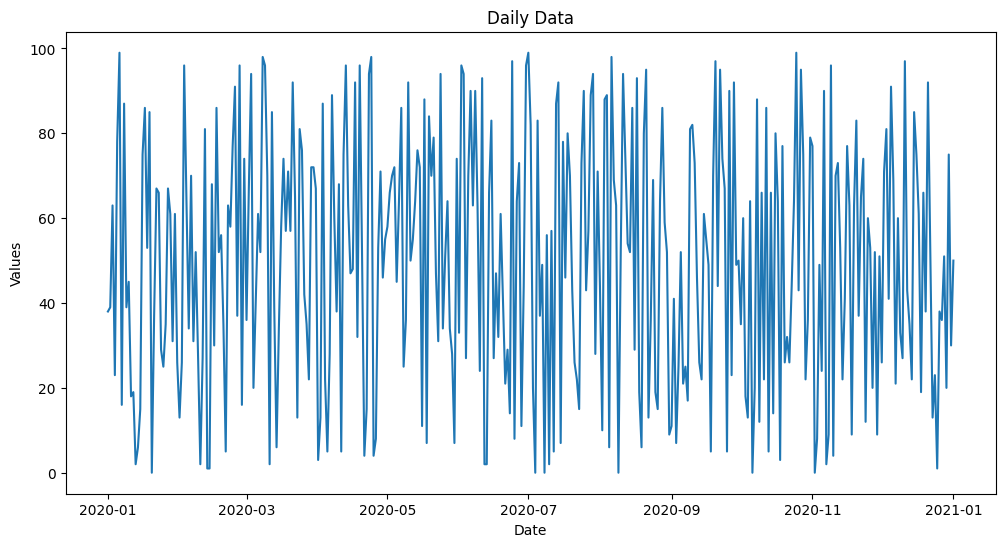

In [ ]:
import numpy as np
date_rng = pd.date_range(start='1/1/2020', end='1/01/2021', freq='D')
df = pd.DataFrame(date_rng, columns=['date'])
df['data'] = np.random.randint(0, 100, size=(len(date_rng)))

# Ensure date is in datetime format
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(df['data'])
plt.title('Daily Data')
plt.xlabel('Date')
plt.ylabel('Values')
plt.show()

In [ ]:
# Define the model
model = ARIMA(df['data'], order=(5, 1, 0))  # (p,d,q) - modify these parameters as needed

# Fit the model
model_fit = model.fit()

# Print summary of the model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                   data   No. Observations:                  367
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1782.853
Date:                Sun, 28 Jul 2024   AIC                           3577.705
Time:                        14:51:36   BIC                           3601.121
Sample:                    01-01-2020   HQIC                          3587.010
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9055      0.053    -16.962      0.000      -1.010      -0.801
ar.L2         -0.7998      0.073    -10.923      0.000      -0.943      -0.656
ar.L3         -0.5701      0.075     -7.571      0.0

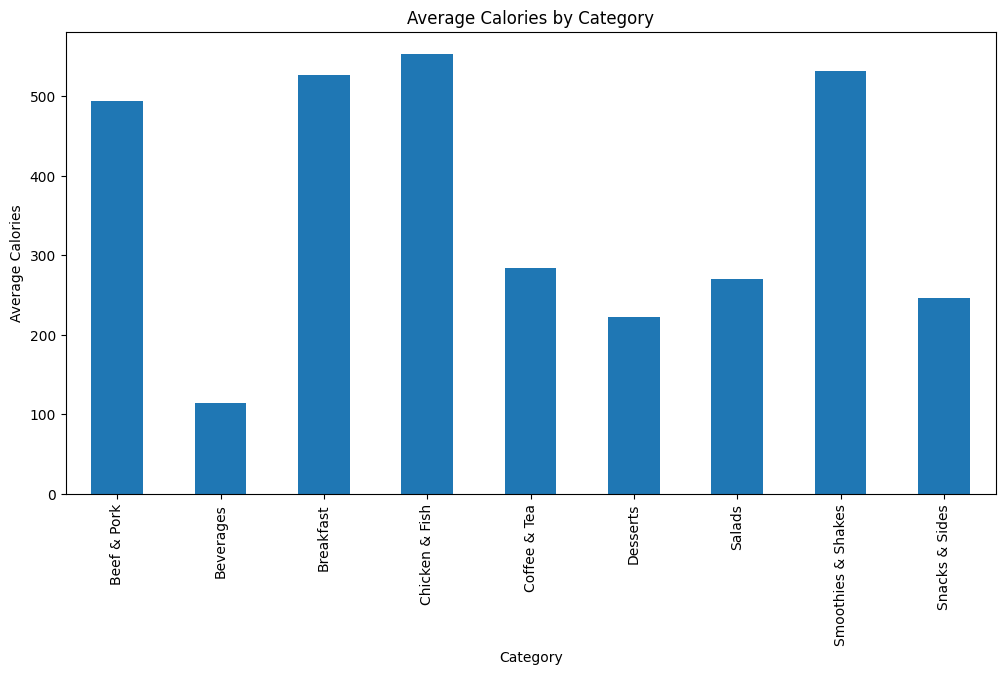

In [ ]:
# Example: Grouping by category and calculating average calories
category_calories = df.groupby('Category')['Calories'].mean()

# Plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
category_calories.plot(kind='bar')
plt.title('Average Calories by Category')
plt.xlabel('Category')
plt.ylabel('Average Calories')
plt.show()



4.Customer and Product Analysis

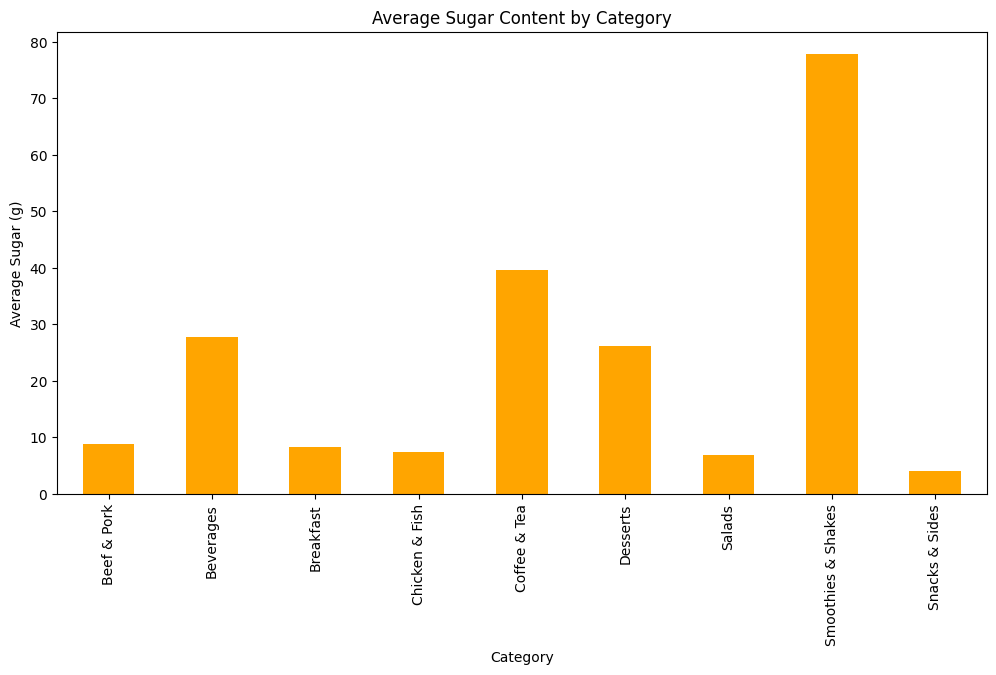

In [ ]:
# Example: Grouping by category and calculating average sugar content
category_sugar = df.groupby('Category')['Sugars'].mean()

# Plotting the results
plt.figure(figsize=(12, 6))
category_sugar.plot(kind='bar', color='orange')
plt.title('Average Sugar Content by Category')
plt.xlabel('Category')
plt.ylabel('Average Sugar (g)')
plt.show()



5.Visualization

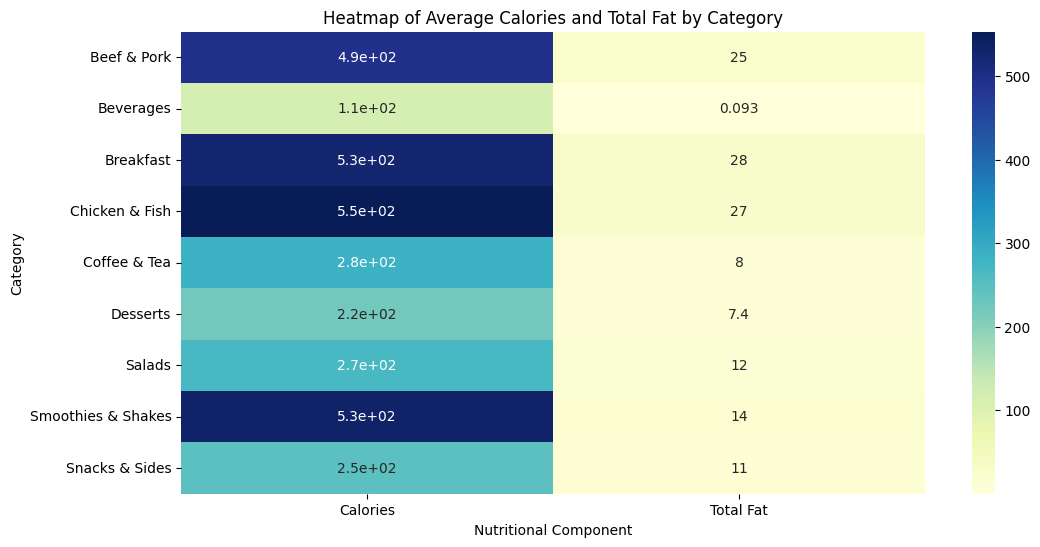

In [ ]:
import seaborn as sns

# Example: Heatmap of calories and total fat content by category
nutrition_pivot = df.pivot_table(index='Category', values=['Calories', 'Total Fat'], aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(nutrition_pivot, annot=True, cmap='YlGnBu')
plt.title('Heatmap of Average Calories and Total Fat by Category')
plt.xlabel('Nutritional Component')
plt.ylabel('Category')
plt.show()


6.Recommendations

1.Healthy Choices: Highlight items with lower calories and fat for health-conscious customers.

2.Menu Adjustments: Consider reducing the sugar content in high-sugar items.

3.Nutritional Information: Provide detailed nutritional information on menus to help customers make informed choices.


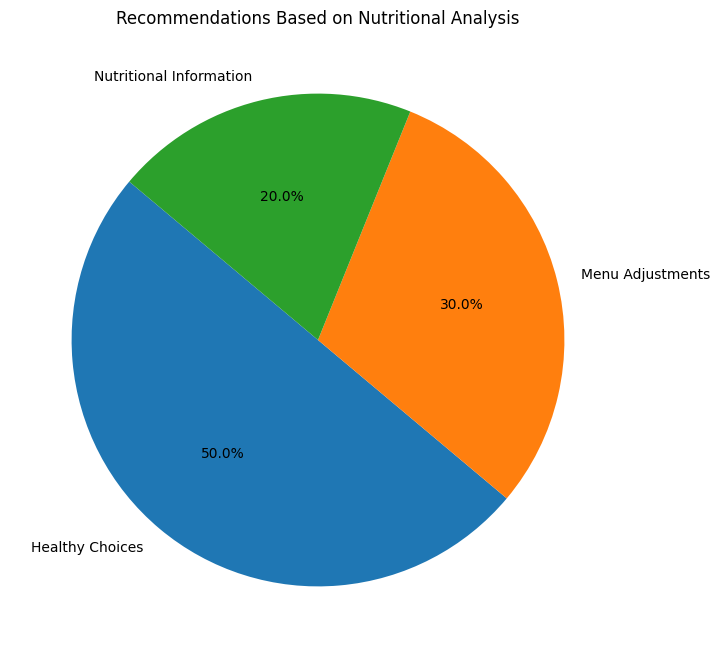

In [ ]:
import matplotlib.pyplot as plt

# Recommendations and their respective importance
recommendations = ['Healthy Choices', 'Menu Adjustments', 'Nutritional Information']
importance = [50, 30, 20]  # Example weights for recommendations

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(importance, labels=recommendations, autopct='%1.1f%%', startangle=140)
plt.title('Recommendations Based on Nutritional Analysis')
plt.show()
